# Projet

## Étude de Cas 2 : Analyse de satisfaction client

### Objectif : Étudier les retours des clients pour identifier les points forts et faibles d’un produit/service.

Sources de données :

Kaggle - Customer Reviews Dataset Trustpilot Open API Twitter API pour collecter des tweets sur un produit.

## Questions à traiter :

Quels sont les mots-clés les plus fréquents dans les commentaires ? Quelle est la répartition des avis positifs et négatifs ? Quels aspects du produit/service sont les plus critiqués ?

## Compétences mobilisées :

Text Mining avec Python (NLTK, spaCy). Analyse des sentiments avec Python (TextBlob, Vader). Google studio ou Power BI pour la visualisation.

## Plan de solution
#### 1. Importation et nettoyage des données (Pandas)
#### 2. Analyse exploratoire des avis des clients (NLTK, Spacy)
#### 3. analyse de la fréquence des mots (WordCloud)
#### 4. analyse des sentiments (TextBlob, Vader)
#### 5. visualisation des résultats

### Importation des librairies python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import re
import nltk

In [2]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [3]:
# Télécharger les stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/corymint/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/corymint/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 1.1 Importer des données

In [8]:
### PATH
directory_path_name = '/Users/corymint/Documents/Formations/Formation Data Analyse/data/'
l_filename_amz_clients_reviews = ['amazon_reviews_multilingual_US_v1_00.tsv', 'amazon_reviews_us_Apparel_v1_00.tsv']

In [10]:
dt_amz_us_clients_reviews_mutli_l = pd.read_csv(directory_path_name + l_filename_amz_clients_reviews[0], sep = '\t', on_bad_lines='skip')

In [11]:
dt_amz_us_clients_reviews_mutli_l.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,53096384,R63J84G1LOX6R,1563890119,763187671,The Sandman Vol. 1: Preludes and Nocturnes,Books,4.0,0.0,1.0,N,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13
1,US,53096399,R1BALOA11Z06MT,1559947608,381720534,The 22 Immutable Laws of Marketing,Books,4.0,0.0,0.0,N,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17
2,US,53096332,R1LLAY5W5PZUS4,0671701800,860650224,Contact,Books,5.0,1.0,2.0,N,N,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30
3,US,53096335,R3R9VTJ82FXECQ,0425132153,624269601,Good Omens,Books,5.0,0.0,0.0,N,N,Funniest book ever written about the Anti-Christ,This is quite possibly *the* funniest book I h...,1995-09-11
4,US,51747709,R1P5J3FNBWTFXY,0517122707,161411385,A Confederacy of Dunces,Books,5.0,0.0,0.0,N,N,A winner that didn't last. Only a mothers love...,The story behind the book is almost better tha...,1995-10-17


## 1.2 Nettoyage des données

In [13]:
def clean_text(text):
    """ nettoyage des texts: mettre en miniscule, retirer les caractère spéciaux... """
    
    if not isinstance(text, str):
        text = str(text)
        
    text = re.sub(r'\d+','', text) # retirer les chiffres
    text = text.lower() # convertir en miniscule
    text = re.sub(r'[^\w\s]', '', text) # retirer la ponctuation
    text = re.sub(r'\s+', ' ', text) # retirer les espaces supplémentaires
    
    return text

In [14]:
# nettoyer les avis des clients
dt_amz_us_clients_reviews_mutli_l['review_body_cleaned'] = dt_amz_us_clients_reviews_mutli_l['review_body'].apply(clean_text)

In [15]:
# nettoyer les titres des avis des clients
dt_amz_us_clients_reviews_mutli_l['review_headline_cleaned'] = dt_amz_us_clients_reviews_mutli_l['review_headline'].apply(clean_text)

In [16]:
dt_amz_us_clients_reviews_mutli_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6900886 entries, 0 to 6900885
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   marketplace              object 
 1   customer_id              int64  
 2   review_id                object 
 3   product_id               object 
 4   product_parent           int64  
 5   product_title            object 
 6   product_category         object 
 7   star_rating              float64
 8   helpful_votes            float64
 9   total_votes              float64
 10  vine                     object 
 11  verified_purchase        object 
 12  review_headline          object 
 13  review_body              object 
 14  review_date              object 
 15  review_body_cleaned      object 
 16  review_headline_cleaned  object 
dtypes: float64(3), int64(2), object(12)
memory usage: 895.0+ MB


## 2. Analyse exploratoire des avis des clients

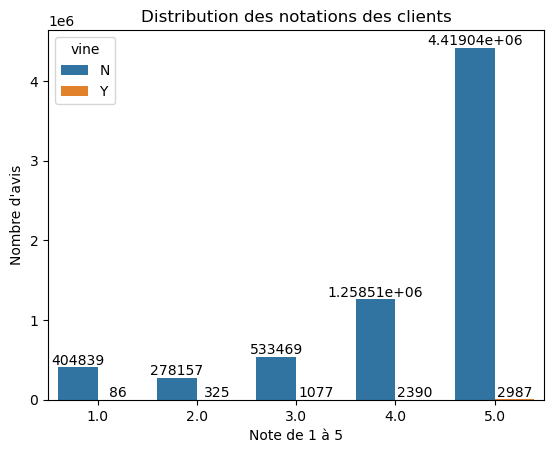

In [18]:
# histogramme des notations des clients

plt.figure()
ax = sbn.countplot(dt_amz_us_clients_reviews_mutli_l, x='star_rating', hue='vine')

for i in ax.containers:
    ax.bar_label(i,) # rajout du nombre d'avis en label sur les barres
    
plt.title('Distribution des notations des clients')
plt.xlabel('Note de 1 à 5')
plt.ylabel("Nombre d'avis")
plt.show()

## 3.1 Analyse des mot fréquents des titres des avis clients

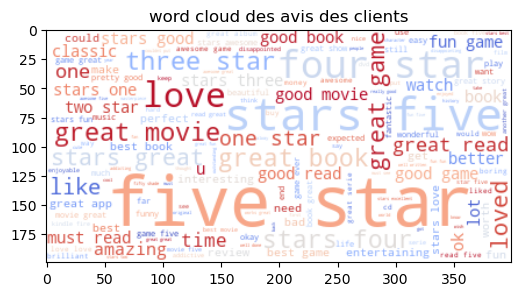

In [119]:
# concatener toutes les avis
all_cleand_reviews_head = ' '.join(dt_amz_us_clients_reviews_mutli_l['review_headline_cleaned'])

# générer le word cloud
wordcloud_reviews_head = WordCloud(stopwords = set(stopwords.words('english')), background_color='white', colormap='coolwarm').generate(all_cleand_reviews_head)

# afficher le word cloud
plt.figure(figsize=(6,8))
plt.imshow(wordcloud_reviews_head, interpolation='bilinear')
plt.title('word cloud des titre avis des clients')
plt.show()

## 3.2 Analyse des mot fréquents des avis clients

In [20]:
# concatener toutes les avis
all_cleand_reviews_body = ' '.join(dt_amz_us_clients_reviews_mutli_l['review_body_cleaned'])

In [ ]:
# générer le word cloud
wordcloud_reviews_body = WordCloud(stopwords = set(stopwords.words('english')), background_color='white', colormap='coolwarm').generate(all_cleand_reviews_body)

# afficher le word cloud
plt.figure(figsize=(6,8))
plt.imshow(wordcloud_reviews_body, interpolation='bilinear')
plt.title('word cloud des avis des clients')
plt.show()